In [5]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
path = Path('../data') / 'allegations.csv'
df = pd.read_csv(path)
df

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Discourtesy,Word,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33354,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Interference with recording,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33355,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Search (of person),66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)
33356,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Vehicle search,66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)


In [7]:
keep_cols = [
    'complaint_id',
    'complainant_ethnicity',
    'complainant_gender',
    'complainant_age_incident',
    'fado_type',
    'allegation',
    'precinct',
    'board_disposition'
]

cleaned_df = df[keep_cols].copy()


In [8]:
cleaned_df = cleaned_df.dropna(subset=['complainant_ethnicity', 'complainant_gender'])

In [9]:
cleaned_df = cleaned_df[~cleaned_df['complainant_ethnicity'].isin(['Unknown', 'Refused'])]

In [23]:
# Population data you provided
pop_data = {
    'Black': 24.3,
    'Hispanic': 28.7,
    'White': 32.1,
    'Asian': 13.6,
    'Other Race': 1.0,
    'American Indian': 0.3
}

# Calculate the percentage of allegations for each ethnicity
allegation_props = (
    cleaned_df['complainant_ethnicity']
    .value_counts(normalize=True)
    .mul(100)
    .reindex(pop_data.keys())  # Ensures the order matches the population data
)

# Create the final DataFrame for plotting
comparison_df = pd.DataFrame({
    'Allegations (%)': allegation_props,
    'Population (%)': pop_data
})

comparison_df

,Allegations (%),Population (%)
Black,62.035828,24.3
Hispanic,23.291993,28.7
White,10.063098,32.1
Asian,1.921961,13.6
Other Race,2.455033,1.0
American Indian,0.232086,0.3


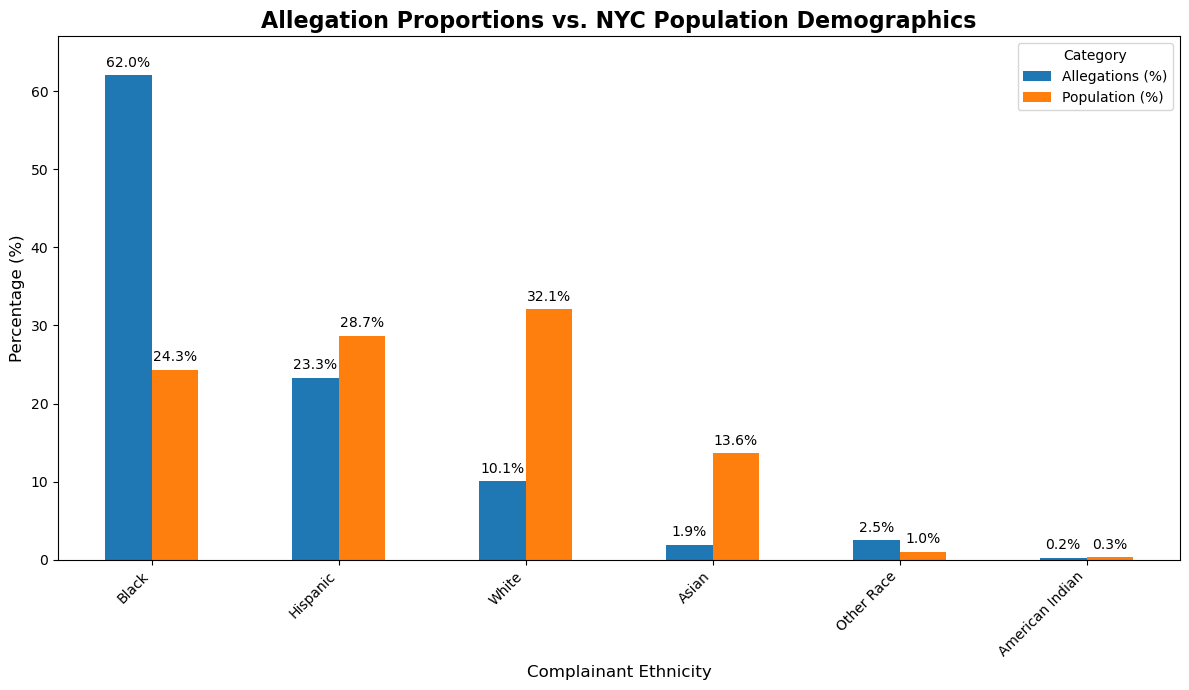

In [ ]:
# Create the bar plot with a specified figure size
ax = comparison_df.plot(kind='bar', figsize=(12, 7), color=['#1f77b4', '#ff7f0e'])

# Add a neutral and informative title
plt.title("Allegation Proportions vs. NYC Population Demographics", fontsize=16, fontweight='bold')

# Set clear labels for the axes
plt.xlabel("Complainant Ethnicity", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)

# Ensure the y-axis starts at 0 for an accurate visual representation
plt.ylim(0, max(comparison_df.max().max(), 50) + 5)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add data labels on top of each bar for clarity
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Add a legend to distinguish the categories
plt.legend(title='Category')

# Adjust the layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

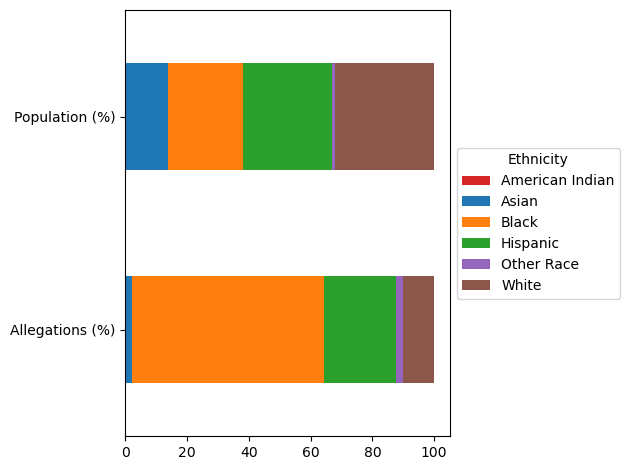

In [12]:
comparison_df = pd.DataFrame({
    'Allegations (%)': cleaned_df['complainant_ethnicity'].value_counts(normalize=True).mul(100),  # from your dataset
    'Population (%)': pop_data  
}).T

comparison_df.plot(
    kind='barh',
    stacked=True,
    color=['#d62728','#1f77b4','#ff7f0e','#2ca02c','#9467bd','#8c564b']
)
plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    title="Ethnicity"
)
plt.tight_layout()
plt.show()



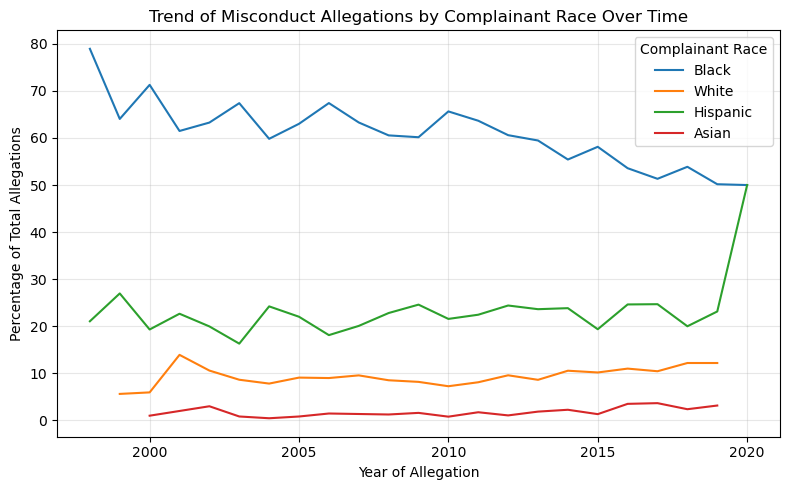

In [13]:
df_year = (
    df.groupby(['year_received', 'complainant_ethnicity'])
      .size()
      .reset_index(name='count')
)

df_year['total_year'] = df_year.groupby('year_received')['count'].transform('sum')
df_year['percent'] = df_year['count'] / df_year['total_year'] * 100

groups = ['Black', 'White', 'Hispanic', 'Asian']
df_plot = df_year[df_year['complainant_ethnicity'].isin(groups)]

plt.figure(figsize=(8, 5))
for grp in groups:
    temp = df_plot[df_plot['complainant_ethnicity'] == grp]
    plt.plot(temp['year_received'], temp['percent'], label=grp)

plt.title("Trend of Misconduct Allegations by Complainant Race Over Time")
plt.xlabel("Year of Allegation")
plt.ylabel("Percentage of Total Allegations")
plt.legend(title="Complainant Race")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


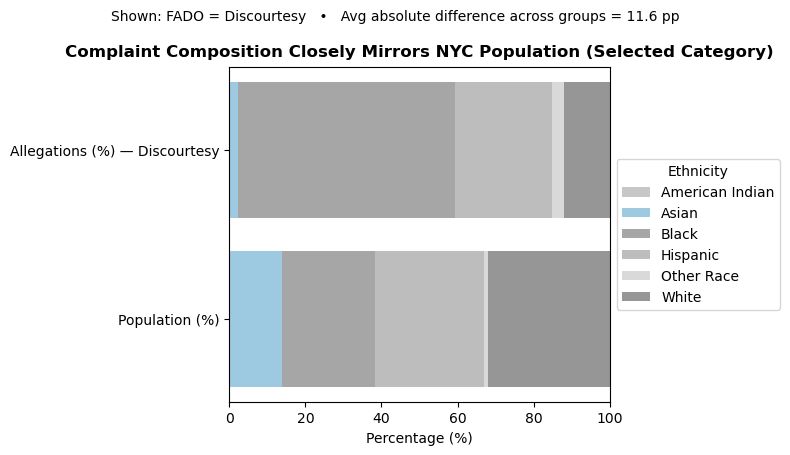

In [14]:
cats = ["American Indian", "Asian", "Black", "Hispanic", "Other Race", "White"]

pop = pd.Series(pop_data).reindex(cats).fillna(0)

def shares(df):
    return (
        df["complainant_ethnicity"]
        .value_counts(normalize=True)
        .mul(100)
        .reindex(cats)
        .fillna(0)
    )

best_type = None
best_slice = None
best_mad = None 

for f in sorted(cleaned_df["fado_type"].dropna().unique()):
    sub = cleaned_df[cleaned_df["fado_type"] == f]
    s = shares(sub)
    mad = (s - pop).abs().mean()
    if (best_mad is None) or (mad < best_mad):
        best_mad, best_type, best_slice = mad, f, s

comparison_df = pd.DataFrame({
    "Population (%)": pop,
    f"Allegations (%) — {best_type}": best_slice
})[["Population (%)", f"Allegations (%) — {best_type}"]].T

fig, ax = plt.subplots(figsize=(8, 4.6))

left = np.zeros(len(comparison_df))
ypos = np.arange(len(comparison_df))

colors = ["#c7c7c7", "#9ecae1", "#a6a6a6", "#bdbdbd", "#d9d9d9", "#969696"]

for i, c in enumerate(cats):
    ax.barh(ypos, comparison_df[c].values, left=left, color=colors[i], label=c)
    left += comparison_df[c].values

ax.set_yticks(ypos)
ax.set_yticklabels(comparison_df.index)
ax.set_xlim(0, 100)                      
ax.set_xlabel("Percentage (%)")

title = "Complaint Composition Closely Mirrors NYC Population (Selected Category)"
subtitle = f"Shown: FADO = {best_type}   •   Avg absolute difference across groups = {best_mad:.1f} pp"
ax.set_title(title, fontweight="bold", pad=8)
plt.suptitle(subtitle, y=0.98, fontsize=10)

ax.legend(title="Ethnicity", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

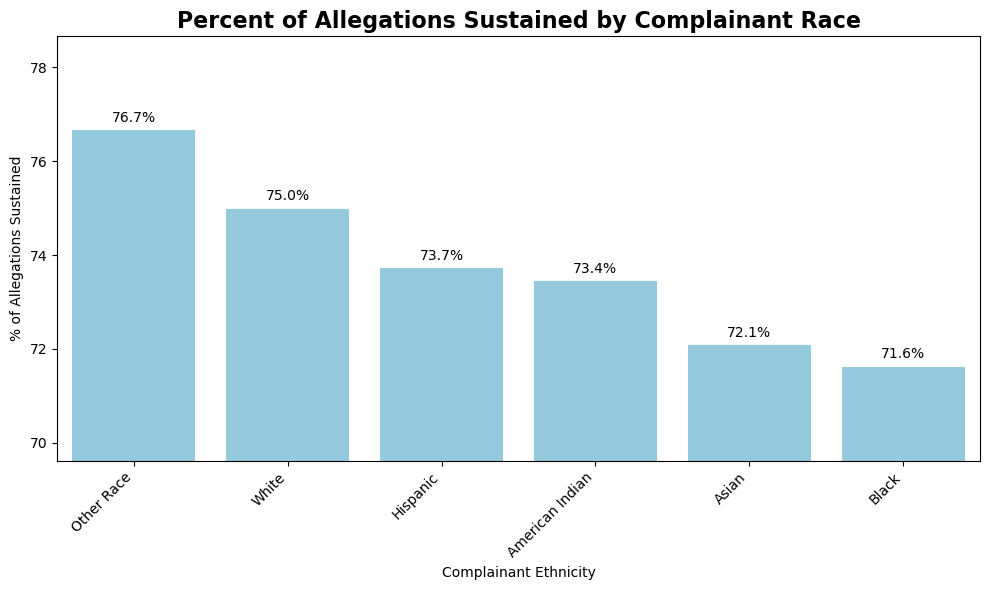

In [26]:
cleaned_df['sustained_flag'] = cleaned_df['board_disposition'].str.contains("Substantiated", case=False, na=False)

# Calculate the sustained rate by complainant ethnicity
outcome_rate = cleaned_df.groupby('complainant_ethnicity')['sustained_flag'].mean().reset_index()
outcome_rate['sustained_flag'] *= 100  # convert to %

# Sort the data for clearer presentation
outcome_rate = outcome_rate.sort_values(by='sustained_flag', ascending=False)

# Create the plot
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(data=outcome_rate, x='complainant_ethnicity', y='sustained_flag', color='skyblue')

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Adjust y-axis to better highlight the differences
min_rate = outcome_rate['sustained_flag'].min()
max_rate = outcome_rate['sustained_flag'].max()
plt.ylim(min_rate - 2, max_rate + 2)


# Set titles and labels
plt.title("Percent of Allegations Sustained by Complainant Race", fontsize=16, fontweight='bold')
plt.xlabel("Complainant Ethnicity")
plt.ylabel("% of Allegations Sustained")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save and show the plot
plt.show()